``Importamos librerias necesarias``

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
datos = pd.read_csv('./Salary_Data.csv', sep=';')

datos.head()


,Años de experiencia,Salario
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [15]:
# Renombramos las columnas
datos.columns = ['AE', 'Salario']
datos.head()

,AE,Salario
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [16]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AE       30 non-null     float64
 1   Salario  30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [17]:
# contar los valores nulos
datos.isna().sum()

AE         0
Salario    0
dtype: int64

Text(0.5, 1.0, 'Años de experiencia vs Salario')

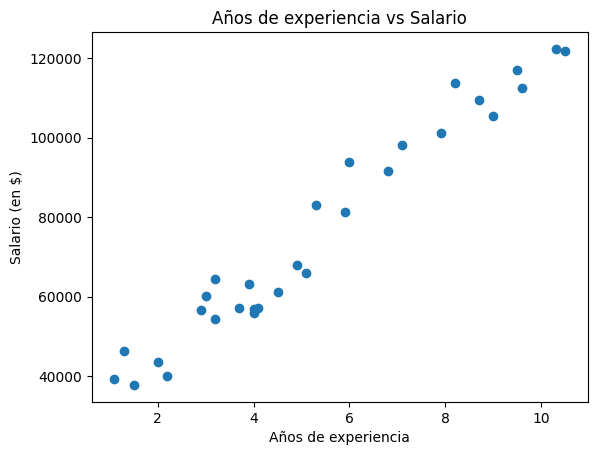

In [19]:
plt.scatter(x=datos['AE'], y=datos['Salario'])
plt.xlabel('Años de experiencia')
plt.ylabel('Salario (en $)')
plt.title('Años de experiencia vs Salario')

In [21]:
datos.corr()

,AE,Salario
AE,1.000000,0.978242
Salario,0.978242,1.000000


<Axes: >

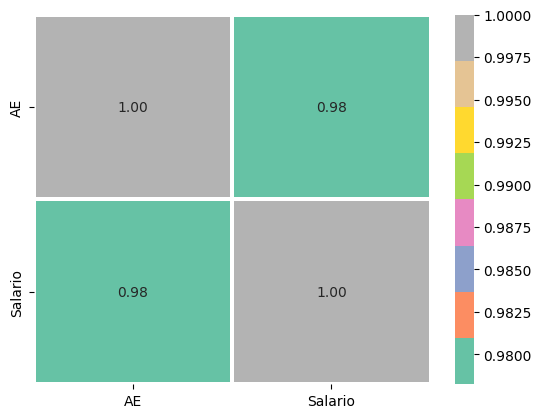

In [22]:
import seaborn as sns
sns.heatmap(datos.corr(), annot=True, fmt='.2f', linewidths=1.5, cmap='Set2')

<Axes: xlabel='AE', ylabel='Salario'>

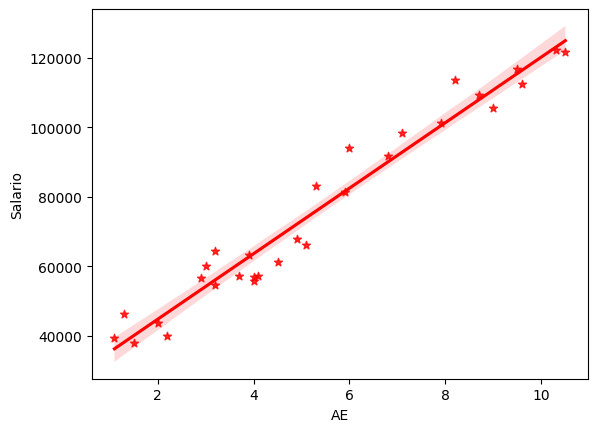

In [29]:
sns.regplot(x='AE', y='Salario', marker='*', color='red', data=datos)

In [55]:
x = datos.drop('Salario', axis=1)
y = datos['Salario']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regresion = LinearRegression()
regresion.fit(x_train, y_train)

y_pred = regresion.predict(x_test)

print(regresion.intercept_)
print(regresion.coef_)
print(f"R2 = {regresion.score(x_train, y_train):.2%}")


26780.09915062818
[9312.57512673]
R2 = 94.12%


In [45]:
import statsmodels.formula.api as smf
data = pd.DataFrame()
data['AE'] = pd.DataFrame(x_train)
data['Salario'] = pd.DataFrame(y_train)

regre = smf.ols(formula='Salario ~ AE', data=data)
regre = regre.fit()
regre.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Salario   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           5.03e-15
Time:                        08:00:22   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.678e+04   2818.687      9.501      0.000    2.09e+04    3.26e+04
AE          9312.5751    496.279     18.765      0.000    8283.355    1.03e+04
==============================================================================
Omnibus:                        3.105   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.567
Skew:                           0.297   Prob(JB):                        0.457
Kurtosis:                       1.898   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Error cuadrático medio: 8302108112.264175


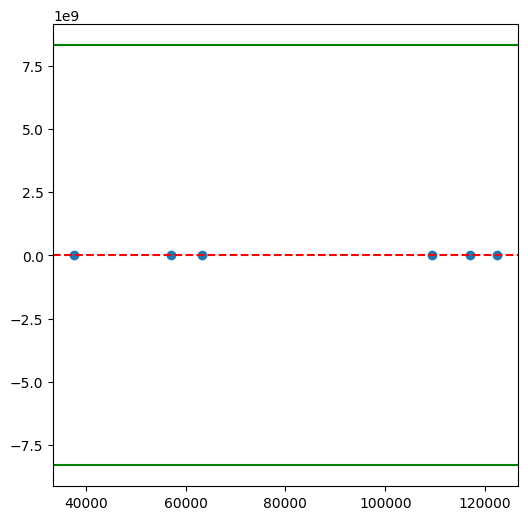

In [53]:
# Sacamos la grafica de residuos (MSE)
from sklearn.metrics import mean_squared_error
y_pred = regresion.predict(x_test)
residuos = y_test - y_pred
fig = plt.figure(figsize=(6,6))
mse = mean_squared_error(x_test, y_pred)
print("Error cuadrático medio:", mse)
plt.scatter(y_test, residuos)
plt.axhline(mse, color='g', linestyle='-')
plt.axhline(-mse, color='g', linestyle='-')
plt.axhline(y=0, color='r', linestyle='--')


In [61]:
# Leer archivo
dt = pd.read_csv('./vida.csv', sep=',')
dt.head()


,habitantes,ingresos,analfabetismo,esp_vida,asesinatos,universitarios,heladas,area,densidad_pobl
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,71.290526
1,365,6315,1.5,69.31,11.3,66.7,152,566432,0.644384
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,19.503249
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,40.619886
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,135.570890


In [60]:
dt.isna().sum()

habitantes        0
ingresos          0
analfabetismo     0
esp_vida          0
asesinatos        0
universitarios    0
heladas           0
area              0
densidad_pobl     0
dtype: int64

In [72]:
dt.corr()

,habitantes,ingresos,analfabetismo,esp_vida,asesinatos,universitarios,heladas,area,densidad_pobl
habitantes,1.000000,0.208228,0.107622,-0.068052,0.343643,-0.098490,-0.332152,0.022544,0.246228
ingresos,0.208228,1.000000,-0.437075,0.340255,-0.230078,0.619932,0.226282,0.363315,0.329968
analfabetismo,0.107622,-0.437075,1.000000,-0.588478,0.702975,-0.657189,-0.671947,0.077261,0.009274
esp_vida,-0.068052,0.340255,-0.588478,1.000000,-0.780846,0.582216,0.262068,-0.107332,0.091062
asesinatos,0.343643,-0.230078,0.702975,-0.780846,1.000000,-0.487971,-0.538883,0.228390,-0.185035
universitarios,-0.098490,0.619932,-0.657189,0.582216,-0.487971,1.000000,0.366780,0.333542,-0.088367
heladas,-0.332152,0.226282,-0.671947,0.262068,-0.538883,0.366780,1.000000,0.059229,0.002277
area,0.022544,0.363315,0.077261,-0.107332,0.228390,0.333542,0.059229,1.000000,-0.341389
densidad_pobl,0.246228,0.329968,0.009274,0.091062,-0.185035,-0.088367,0.002277,-0.341389,1.000000


Text(0.5, 1.0, 'Habitantes vs Esperanza de vida')

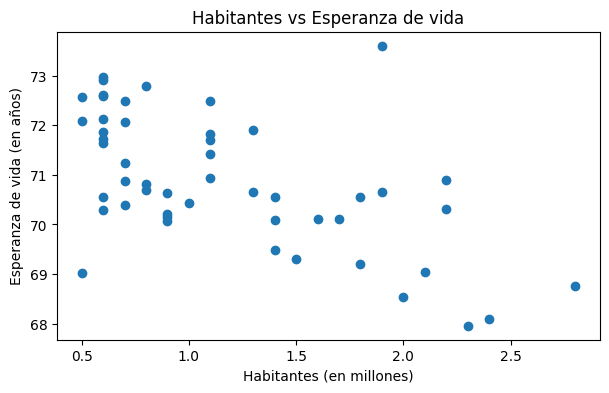

In [70]:
plt.figure(figsize=(7,4))
plt.scatter(x=dt['analfabetismo'], y=dt['esp_vida'])
plt.xlabel('Habitantes (en millones)')
plt.ylabel('Esperanza de vida (en años)')
plt.title('Habitantes vs Esperanza de vida')


<Axes: xlabel='analfabetismo', ylabel='esp_vida'>

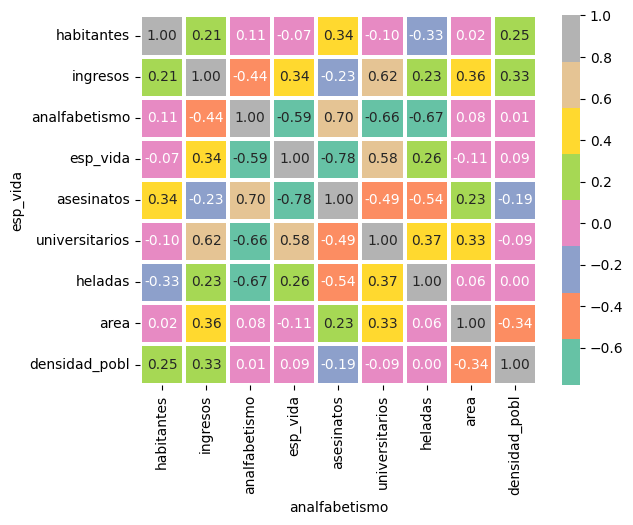

In [ ]:
sns.heatmap(dt.corr(), annot=True, fmt='.2f', linewidths=1.5, cmap='Set2')


In [76]:
x = dt.drop('esp_vida', axis=1)
y = dt['esp_vida']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regresion = LinearRegression()
regresion.fit(x_train, y_train)
y_pred = regresion.predict(x_test)
print(regresion.intercept_)
print(regresion.coef_)
print(f"R2 = {regresion.score(x_train, y_train):.2%}")

69.48209279419265
[ 8.63076746e-05  1.77981685e-04  1.39437702e-01 -2.81582239e-01
  5.08069318e-02 -2.62263936e-03 -1.47779550e-06 -1.29726020e-03]
R2 = 75.71%


In [83]:
#hacer el ols
import statsmodels.formula.api as smf
data = pd.DataFrame()
data['analfabetismo'] = pd.DataFrame(x_train["analfabetismo"])
data['esp_vida'] = pd.DataFrame(y_train)
regre = smf.ols(formula='esp_vida ~ analfabetismo', data=data)
regre = regre.fit()
regre.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               esp_vida   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     46.07
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           4.78e-08
Time:                        09:22:22   Log-Likelihood:                -51.764
No. Observations:                  40   AIC:                             107.5
Df Residuals:                      38   BIC:                             110.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        72.5851      0.305    238.311      0.000      71.968      73.202
analfabetismo    -1.5561      0.229     -6.787      0.000      -2.020      -1.092
==============================================================================
Omnibus:                        8.618   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                2.858
Skew:                           0.276   Prob(JB):                        0.240
Kurtosis:                       1.812   Cond. No.                         4.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
data = pd.DataFrame()
data['asesinatos'] = pd.DataFrame(x_train["asesinatos"])
data['esp_vida'] = pd.DataFrame(y_train)
regre = smf.ols(formula='esp_vida ~ asesinatos', data=data)
regre = regre.fit()
regre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               esp_vida   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     74.91
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.61e-10
Time:                        09:38:42   Log-Likelihood:                -45.864
No. Observations:                  40   AIC:                             95.73
Df Residuals:                      38   BIC:                             99.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.9211      0.279    261.804      0.000      72.357      73.485
asesinatos    -0.2901      0.034     -8.655      0.000      -0.358      -0.222
==============================================================================
Omnibus:                        1.353   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.145
Skew:                          -0.403   Prob(JB):                        0.564
Kurtosis:                       2.804   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""